In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv"
)
df.head()

,gameString,gameDate,visitor,home,inning,side,balls,strikes,outs,batterId,...,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallType,battedBallAngle,battedBallDistance,paResult
0,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,0,452655,...,2044.22,205.477,-0.374,2.933,-6.93,8.28,NaN,NaN,NaN,NaN
1,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,0,452655,...,1966.32,220.143,0.342,3.223,-7.48,7.35,NaN,NaN,NaN,NaN
2,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,2,0,452655,...,2127.17,198.816,0.389,2.266,-5.22,9.79,FB,27.78,323.03,IP_OUT
3,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,1,605412,...,1947.11,198.734,-0.004,2.380,-7.24,8.40,NaN,NaN,NaN,NaN
4,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,1,605412,...,1903.08,205.503,0.272,2.421,-6.79,9.37,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

Keep only the pitch type and the numeric columns (exluding ID fields).
Drop any remaining records that contain null values.
Consider pitchType as y/target and the remaining columns to be X/features.

In [4]:
df_original = df.copy()

<IPython.core.display.Javascript object>

In [5]:
df.isna().sum()

gameString                0
gameDate                  0
visitor                   0
home                      0
inning                    0
side                      0
balls                     0
strikes                   0
outs                      0
batterId                  0
batterName                0
batterHand                0
batterPosition            0
pitcherId                 0
pitcherName               0
pitcherHand               0
timesFaced                0
catcherId                 0
catcher                   0
umpireId                  0
umpire                    0
probCalledStrike         10
pitchResult               0
pitchType                 0
releaseVelocity           0
spinRate               6197
spinDir                 311
locationHoriz             0
locationVert              0
movementHoriz             0
movementVert              0
battedBallType        65432
battedBallAngle       65432
battedBallDistance    65432
paResult              59340
dtype: int64

<IPython.core.display.Javascript object>

In [6]:
drop_cols = ["batterId", "pitcherId", "catcherId", "umpireId"]

df = df.select_dtypes("number")
df = df.drop(columns=drop_cols)
df = df.dropna()

df_cols = df.columns
df_index = df.index

df.original = df_original.loc[df.index, :]

df.head()

<ipython-input-6-28297c5e91d6>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.original = df_original.loc[df.index, :]


,inning,balls,strikes,outs,timesFaced,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallAngle,battedBallDistance
2,1,0,2,0,1,0.968,96.5,2127.17,198.816,0.389,2.266,-5.22,9.79,27.78,323.03
5,1,0,2,1,1,0.321,98.3,2038.06,206.732,-0.206,1.430,-8.30,7.96,-15.32,121.39
8,1,1,1,2,1,0.944,96.3,1909.36,203.540,-0.280,1.990,-6.03,7.98,-34.27,97.07
11,1,1,1,0,1,0.753,92.5,2424.90,140.242,-0.523,1.858,9.10,10.75,-32.44,257.08
23,1,2,2,0,1,0.974,92.1,2319.27,138.209,-0.666,2.667,6.46,9.35,2.02,305.16


<IPython.core.display.Javascript object>

In [7]:
X = df.copy()
y = df_original["pitchType"]

<IPython.core.display.Javascript object>


Reduce the dimensionality of the data using PCA to two components

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns, index=df.index)

<IPython.core.display.Javascript object>

In [9]:
pca = PCA(2)
pca.fit(X)

PCA(n_components=2)

<IPython.core.display.Javascript object>

In [11]:
pca.explained_variance_ratio_
print(f"Total variance explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Total variance explained: 26.74%


<IPython.core.display.Javascript object>

Generate a scatter plot that visualizes how the component values are distributed

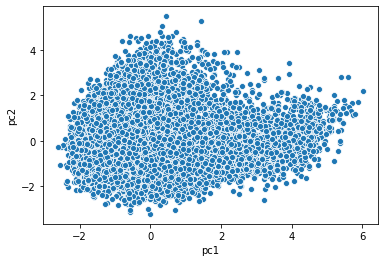

<IPython.core.display.Javascript object>

In [12]:
pc_df = pca.transform(X)
pc_df = pd.DataFrame(pc_df, columns=["pc1", "pc2"], index=df.index)

sns.scatterplot(x="pc1", y="pc2", data=pc_df)
plt.show()

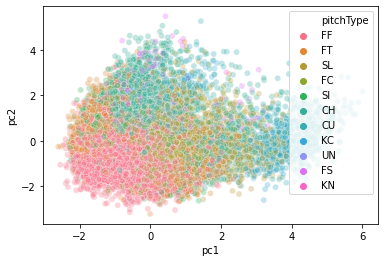

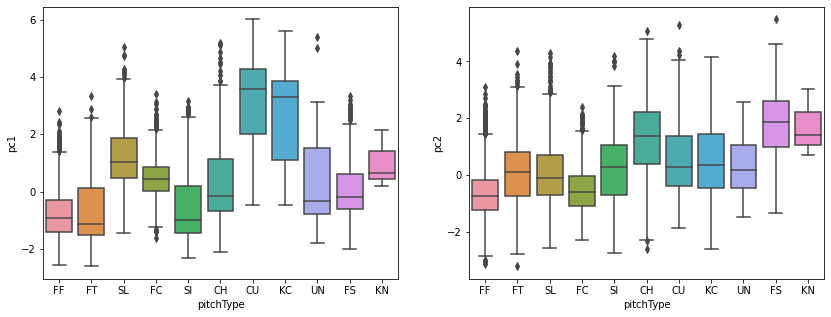

<IPython.core.display.Javascript object>

In [13]:
plot_df = pc_df.copy()
plot_df["pitchType"] = y

sns.scatterplot(x="pc1", y="pc2", hue="pitchType", alpha=0.3, data=plot_df)
plt.show()

fix, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x="pitchType", y="pc1", data=plot_df, ax=axes[0])
sns.boxplot(x="pitchType", y="pc2", data=plot_df, ax=axes[1])
plt.show()


Create a line plot that shows the explained variance by number of components

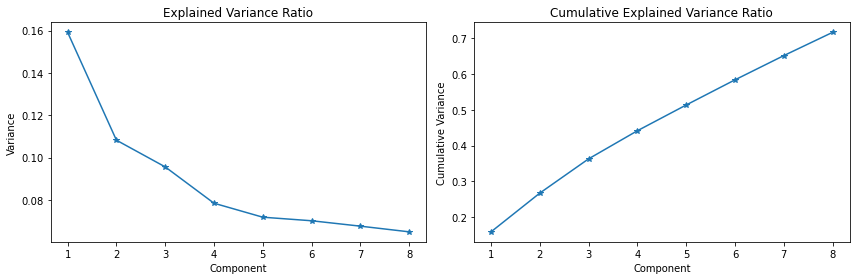

<IPython.core.display.Javascript object>

In [14]:
# creating more than 2 points for the plot
pca_8 = PCA(8).fit(X)

expl_var = pca_8.explained_variance_ratio_
cumulative_var = np.cumsum(expl_var)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(np.arange(1, 9), expl_var, "-*")
axes[0].set_title("Explained Variance Ratio")
axes[0].set_xlabel("Component")
axes[0].set_ylabel("Variance")

axes[1].plot(np.arange(1, 9), cumulative_var, "-*")
axes[1].set_title("Cumulative Explained Variance Ratio")
axes[1].set_xlabel("Component")
axes[1].set_ylabel("Cumulative Variance")

plt.tight_layout()
plt.show()

Iteratively train and score a Random Forest Classifier, storing the number of components and accompanying model scores in a list

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [13438, 79931]

<IPython.core.display.Javascript object>